Importons les librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


Chargeons la base de données "train"

In [2]:
df = pd.read_csv('data_train.csv')
# Affiche les premières lignes du fichier
print(df.head())


       id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  148827  Female   45                1         46.0                   0   
1  336454    Male   25                1          8.0                   1   
2  367514  Female   57                1         28.0                   1   
3  355747    Male   50                1         33.0                   0   
4  238473  Female   21                1         28.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         21406.0                 124.0       22   
1    < 1 Year             No         58078.0                 152.0       86   
2    1-2 Year             No          2630.0                  26.0      214   
3    1-2 Year            Yes          2630.0                 163.0       61   
4    < 1 Year            Yes         44589.0                 152.0      131   

   Response  
0         0  
1         0  
2         0  
3         0 

Simplification de la visualisation des données

In [3]:
df = df.drop(columns=['id','Region_Code'])
df

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Female,45,1,0,1-2 Year,Yes,21406.0,124.0,22,0
1,Male,25,1,1,< 1 Year,No,58078.0,152.0,86,0
2,Female,57,1,1,1-2 Year,No,2630.0,26.0,214,0
3,Male,50,1,0,1-2 Year,Yes,2630.0,163.0,61,0
4,Female,21,1,0,< 1 Year,Yes,44589.0,152.0,131,0
...,...,...,...,...,...,...,...,...,...,...
346071,Female,37,1,0,1-2 Year,Yes,2630.0,156.0,218,0
346072,Male,54,1,0,> 2 Years,Yes,36962.0,122.0,36,0
346073,Female,25,1,1,< 1 Year,No,37004.0,152.0,294,0
346074,Male,22,1,1,< 1 Year,No,40338.0,152.0,67,0


Regardons la répartitions des différentes données dans la base

In [4]:
# Afficher les valeurs uniques dans la première colonne
print(df.iloc[:, 0].unique())

# Compter les occurrences
counts = df.iloc[:, 0].value_counts() /346076

print("Nombre de chaque catégorie :")
print(counts)


['Female' 'Male']
Nombre de chaque catégorie :
Gender
Male      0.533706
Female    0.466294
Name: count, dtype: float64


In [5]:
# Afficher les valeurs uniques dans la dernière colonne
print(df.iloc[:, 9].unique())

# Compter les occurrences
counts = df.iloc[:, 9].value_counts() /346076

print("Nombre de chaque catégorie :")
print(counts)

[0 1]
Nombre de chaque catégorie :
Response
0    0.966259
1    0.033741
Name: count, dtype: float64


On remarque qu'il y a un trop fort déséquilibre entre le nombre de client pas intéressé et ceux intéressé.
On va donc gérer ce déséquilibre

Méthode : Rééchantillonnage (Resampling)


Sur-échantillonnage (Oversampling) : On augmente artificiellement les données de la classe minoritaire.

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Pour appliquer SMOTE, on doit convertir les chaines de caracteres en valeurs numériques

df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes': 1,'No': 0})
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year': 0,'1-2 Year': 1,'> 2 Years': 2})

df = df.fillna(0) # les valeurs na deviennent 0

# Séparer les caractéristiques et les étiquettes
X = df.iloc[:, :-1].values  # Toutes les colonnes sauf la dernière (caractéristiques)
y = df.iloc[:, -1].values   # Dernière colonne (étiquettes/classes)

# Vérifier la répartition avant SMOTE
print("Avant SMOTE :", Counter(y))

# Appliquer SMOTE pour sur-échantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Vérifier la répartition après SMOTE
print("Après SMOTE :", Counter(y_resampled))

Avant SMOTE : Counter({0: 334399, 1: 11677})
Après SMOTE : Counter({0: 334399, 1: 334399})


Sous-échantillonnage (Undersampling) : Réduisez les données de la classe majoritaire pour équilibrer la distribution.

Effectuons le prétraitement des données

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



Appliquons la méthode de classification : K-Nearest Neighbors (KNN)

Normalisons les données 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Entrainons notre modèle

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Prédiction

In [10]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = knn.predict(X_test_scaled)
print("\nRapport:\n", classification_report(y_test, y_pred))



Rapport:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91     66833
           1       0.88      0.95      0.91     66927

    accuracy                           0.91    133760
   macro avg       0.91      0.91      0.91    133760
weighted avg       0.91      0.91      0.91    133760



Matrice de confusion

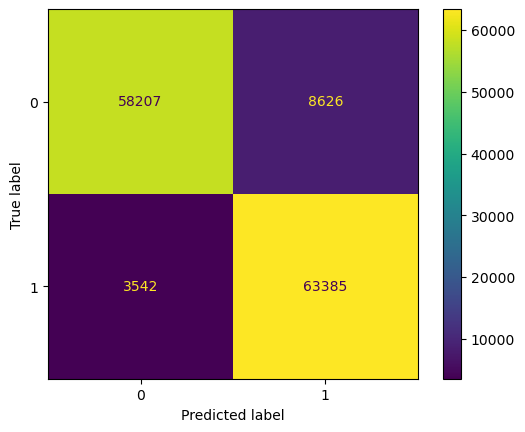

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Appliquons le aux données "test"

Visualisons ces données

In [12]:
df_test = pd.read_csv('df_test.csv', index_col=0)

df_test

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,41,1,1,2,0,32379.0,124.0,277,0
1,0,35,1,1,2,0,2630.0,160.0,61,0
2,0,25,1,0,1,0,2630.0,152.0,242,0
3,1,53,1,0,2,1,36242.0,163.0,253,0
4,1,27,1,1,1,0,38770.0,152.0,125,0
...,...,...,...,...,...,...,...,...,...,...
127032,1,25,1,1,1,0,36453.0,152.0,61,1
127033,1,56,1,0,2,1,35507.0,26.0,136,0
127034,0,35,1,0,2,1,29041.0,124.0,35,0
127035,1,55,1,1,2,0,63775.0,124.0,284,0


In [13]:
print(df_test.iloc[:, 9].unique())

# Compter les occurrences
counts = df_test.iloc[:, 9].value_counts() /127037

print("Nombre de chaque catégorie :")
print(counts)

[0 1]
Nombre de chaque catégorie :
Response
0    0.783229
1    0.216771
Name: count, dtype: float64


Prédiction sur les nouvelles données

In [14]:
y_test_final_pred = knn.predict(df_test.iloc[:, :-1].values)

In [15]:
print("Prédictions : ", y_test_final_pred)


Prédictions :  [0 0 0 ... 0 0 0]


Ajoutons ces prédiction au DataFrame

In [16]:
df_results = pd.DataFrame({'Prediction': y_test_final_pred})

print(df_results)

        Prediction
0                0
1                0
2                0
3                0
4                0
...            ...
127032           0
127033           1
127034           0
127035           0
127036           0

[127037 rows x 1 columns]


Comparaison par rapport à df_test

In [17]:
df_test_subset = df_test.iloc[:len(df_results)]  # Prendre les premières lignes pour correspondre

# Comparer les prédictions de df_results avec la colonne 'Response' correspondante
matches = df_results['Prediction'] == df_test_subset['Response']

percentage_matches = matches.mean() * 100

print(percentage_matches)


71.02970000865889
